# Load LIbrary

In [1]:
import pandas as pd
from pandas import Series,DataFrame


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.family']='SimHei'
plt.rcParams['axes.unicode_minus']=False #正常顯示負號



from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# 載入訓練資料

In [2]:
df = pd.read_csv("train.csv")

print ('訓練資料集統計資訊')
df.info()

print ('----------------------------------')
print ('該欄位有null值的比例')
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['筆數', '%'])
missing_data.head(5)

訓練資料集統計資訊
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------
該欄位有null值的比例


,筆數,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


### 遺失值的欄位 : Cabin / Age / Embarked

# 重新產生新的訓練資料集

In [3]:
# 重新載入訓練資料集
df = pd.read_csv("train.csv")

#Age欄位：補入遺失值 且 補入的值需轉換為int
Age = df[['Age']].fillna(np.mean(df[['Age']])).astype(int)

#Embarked：補入遺失值 且 補入的值為S
df["Embarked"] = df["Embarked"].fillna("S")

#宣告訓練資料集的dataset
df = df [['PassengerId','Survived','Pclass','Sex','SibSp','Parch','Ticket','Embarked']]

#將處理好的Age欄位與練資料集的dataset進行合併的動作 
df_ml = pd.merge(df, Age ,left_index=True, right_index=True)

#df_ml.head()

#將Sex欄位進行Label Encoding (原先的型態為object 需進行轉換對應)
df_ml['Sex_rank'] = df_ml['Sex'].replace({'male':1,'female':2})

#將Embarked欄位進行Label Encoding (原先的型態為object 需進行轉換對應)
df_ml['Embarked_rank'] = df_ml['Embarked'].replace({'S':1,'C':2,'Q':3})

#確認新的dataset的資訊 - 須確認Sex_rank 與 Embarked_rank 須為int64的datatype

df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId      891 non-null int64
Survived         891 non-null int64
Pclass           891 non-null int64
Sex              891 non-null object
SibSp            891 non-null int64
Parch            891 non-null int64
Ticket           891 non-null object
Embarked         891 non-null object
Age              891 non-null int64
Sex_rank         891 non-null int64
Embarked_rank    891 non-null int64
dtypes: int64(8), object(3)
memory usage: 76.6+ KB


In [4]:
# 顯示五筆新的dataset的完整資訊
df_ml.sample(5)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Embarked,Age,Sex_rank,Embarked_rank
738,739,0,3,male,0,0,349201,S,29,1,1
86,87,0,3,male,1,3,W./C. 6608,S,16,1,1
372,373,0,3,male,0,0,323951,S,19,1,1
657,658,0,3,female,1,1,364849,Q,32,2,3
741,742,0,1,male,1,0,19877,S,36,1,1


# 載入測試資料

In [5]:
df_test = pd.read_csv("test.csv")

print ('訓練資料集統計資訊')
df_test.info()

print ('----------------------------------')
print ('該欄位有null值的比例')
total = df_test.isnull().sum().sort_values(ascending=False)
percent_1 = df_test.isnull().sum()/df_test.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['筆數', '%'])
missing_data.head(5)

訓練資料集統計資訊
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
----------------------------------
該欄位有null值的比例


,筆數,%
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2
Embarked,0,0.0
Ticket,0,0.0


### 遺失值的欄位 : Cabin / Age / Fare

# 重新產生新的測試資料集

In [6]:
# 重新載入測試資料集
df_test = pd.read_csv("test.csv")

#Age欄位：補入遺失值 且 補入的值需轉換為int
Age = df_test[['Age']].fillna(np.mean(df_test[['Age']])).astype(int)


#宣告訓練資料集的dataset
df_test = df_test [['PassengerId','Pclass','Sex','SibSp','Parch','Ticket','Embarked']]

#將處理好的Age欄位與練資料集的dataset進行合併的動作 
df_test_ml = pd.merge(df_test, Age ,left_index=True, right_index=True)

#df_ml.head()

#將Sex欄位進行Label Encoding (原先的型態為object 需進行轉換對應)
df_test_ml['Sex_rank'] = df_test_ml['Sex'].replace({'male':1,'female':2})

#將Embarked欄位進行Label Encoding (原先的型態為object 需進行轉換對應)
df_test_ml['Embarked_rank'] = df_test_ml['Embarked'].replace({'S':1,'C':2,'Q':3})

#確認新的dataset的資訊 - 須確認Sex_rank 與 Embarked_rank 須為int64的datatype

df_test_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId      418 non-null int64
Pclass           418 non-null int64
Sex              418 non-null object
SibSp            418 non-null int64
Parch            418 non-null int64
Ticket           418 non-null object
Embarked         418 non-null object
Age              418 non-null int64
Sex_rank         418 non-null int64
Embarked_rank    418 non-null int64
dtypes: int64(7), object(3)
memory usage: 32.7+ KB


In [7]:
# 顯示五筆新的dataset的完整資訊
df_test_ml.sample(5)

,PassengerId,Pclass,Sex,SibSp,Parch,Ticket,Embarked,Age,Sex_rank,Embarked_rank
292,1184,3,male,0,0,2652,C,30,1,2
366,1258,3,male,1,0,2689,C,30,1,2
110,1002,2,male,0,0,237734,C,41,1,2
258,1150,2,female,0,0,28404,S,19,2,1
116,1008,3,male,0,0,2681,C,30,1,2


# 找出哪一個 feature適合拿來進行預測

### Pclass

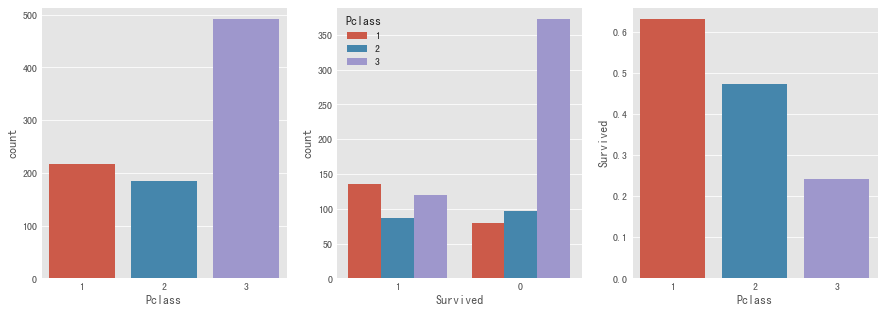

In [8]:
# 針對PClass與Survived的狀況進行分析
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

#PClass筆數統計分析長條圖
sns.countplot(x='Pclass', data=df_ml, ax=axis1)

#依據PClass的狀況分析Survived的機會(哪一個筆數最多)
sns.countplot(x='Survived', hue="Pclass", data=df_ml, order=[1,0], ax=axis2)

#哪一個PClass的生存機率最高
embark_perc = df_ml[["Pclass", "Survived"]].groupby(['Pclass'],as_index=False).mean()
sns.barplot(x='Pclass', y='Survived', data=embark_perc,ax=axis3)

### Sex

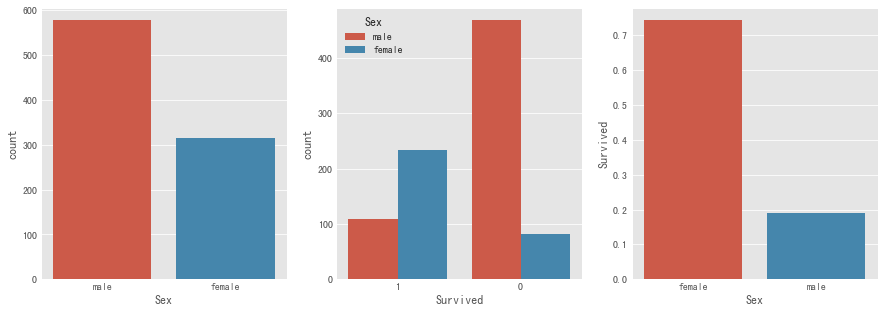

In [9]:
# 針對Sex與Survived的狀況進行分析
fig, (axis4,axis5,axis6) = plt.subplots(1,3,figsize=(15,5))

#Sex筆數統計分析長條圖
sns.countplot(x='Sex', data=df_ml, ax=axis4)

#依據Sex的狀況分析Survived的機會(哪一個筆數最多)
sns.countplot(x='Survived', hue="Sex", data=df_ml, order=[1,0], ax=axis5)

#哪一個Sex的生存機率最高
embark_perc = df_ml[["Sex", "Survived"]].groupby(['Sex'],as_index=False).mean()
sns.barplot(x='Sex', y='Survived', data=embark_perc,ax=axis6)

### Age

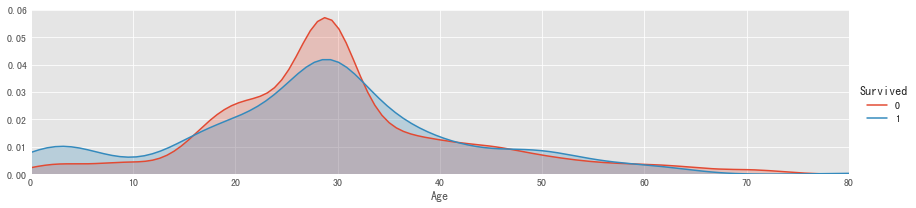

In [10]:
facet = sns.FacetGrid(df_ml, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df_ml['Age'].max()))
facet.add_legend()

### Embarked

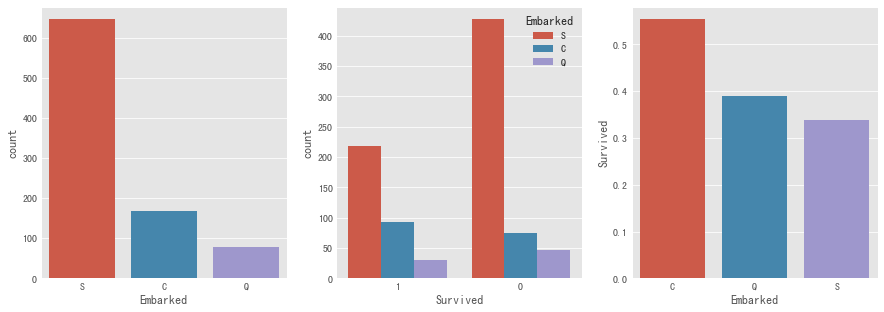

In [11]:
# 針對Embarked與Survived的狀況進行分析
fig, (axis7,axis8,axis9) = plt.subplots(1,3,figsize=(15,5))

#Embarked筆數統計分析長條圖
sns.countplot(x='Embarked', data=df_ml, ax=axis7)

#依據Embarked的狀況分析Survived的機會(哪一個筆數最多)
sns.countplot(x='Survived', hue="Embarked", data=df_ml, order=[1,0], ax=axis8)

#哪一個Embarked的生存機率最高
embark_perc = df_ml[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,ax=axis9)

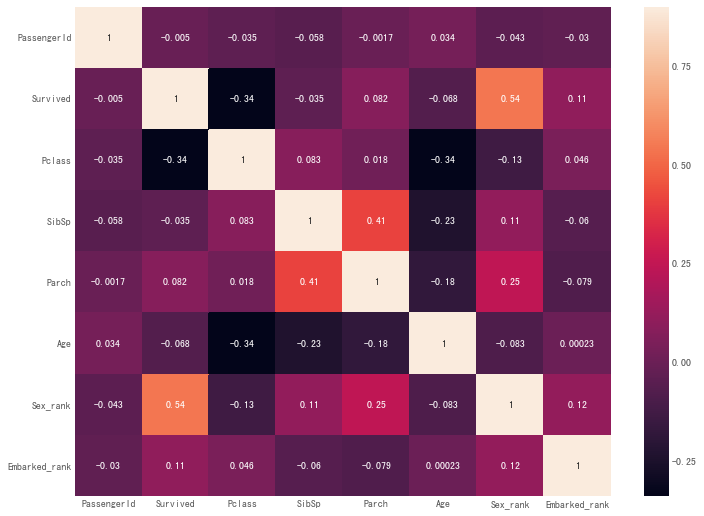

In [12]:
corrmat = df_ml.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, annot=True)

In [13]:
from sklearn.model_selection import train_test_split

X_train = df_ml[['Pclass','Age','Sex_rank','Embarked_rank','SibSp','Parch']]
#X_train = df_ml[['Pclass','Age','Sex_rank','SibSp','Parch']]


y_train = df_ml['Survived']
#X_test = df_test_ml[['Pclass','Age','Sex_rank','SibSp','Parch']]
X_test = df_test_ml[['Pclass','Age','Sex_rank','Embarked_rank','SibSp','Parch']]

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# 使用單一分類器進行預測

## 決策分類樹

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

tree = DecisionTreeClassifier(criterion = 'gini', max_depth=5)
tree.fit(X_train_std, y_train)
y_test = tree.predict(X_test)
tree.score(X_train, y_train)

0.61616161616161613

## KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_std, y_train)
knn.score(X_train, y_train)

0.6262626262626263

## SVC

In [17]:
from sklearn.svm import SVC

svc = SVC(C=1.0, kernel="rbf")
svc.fit(X_train_std, y_train)
svc.score(X_train, y_train)

0.61616161616161613

## LogisticRegression

In [18]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_test = logreg.predict(X_test)

logreg.score(X_train, y_train)

0.79797979797979801

# 使用整體學習進行預測

## Bagging

In [19]:
from sklearn.ensemble import BaggingClassifier

bagc = BaggingClassifier(n_estimators=100)
bagc.fit(X_train, y_train)
bagc.score(X_train, y_train)

0.93378226711560042

## 隨機森林(Random Forest)

In [20]:
random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, y_train)

Y_test = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

0.93378226711560042

In [21]:
#submission = pd.DataFrame({
#        "PassengerId": df_test_ml["PassengerId"],
#        "Survived": y_test
#    })
#submission.to_csv('gender_submission.csv', index=False)